<a href="https://colab.research.google.com/github/Isaac0py/Class/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3D Clustering Age, Annual Income and Spending Score

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [22]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=0)

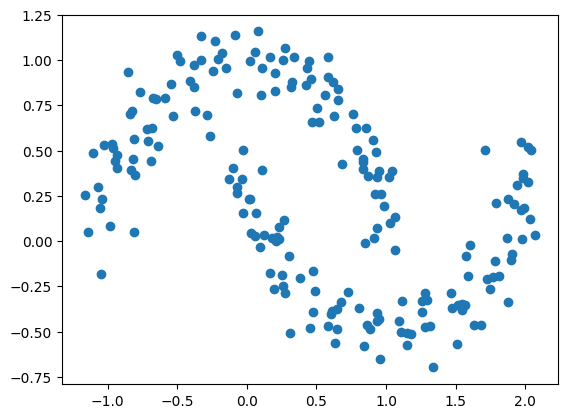

In [23]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [24]:
from sklearn.cluster import KMeans

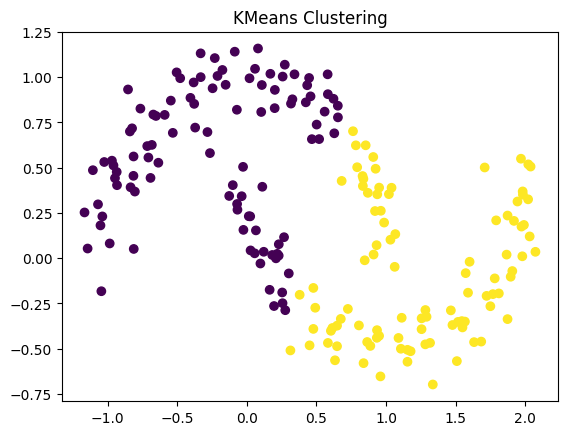

In [25]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_

#scatterplot
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('KMeans Clustering')
plt.show()

Text(0.5, 1.0, 'DBSCAN Clustering')

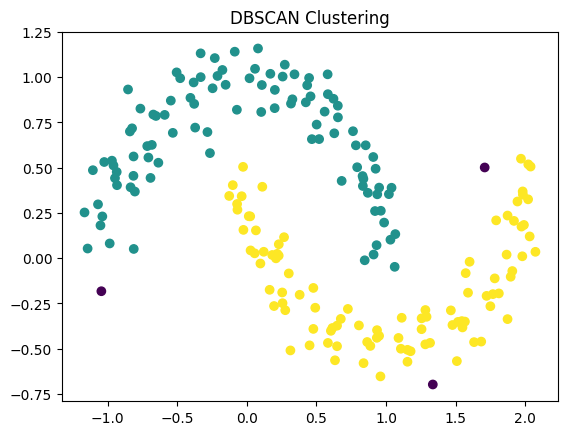

In [26]:
#DBSCAN coding

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(X)
#clusters

#scatter plot
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title('DBSCAN Clustering')

In [29]:
from sklearn.cluster import SpectralClustering

In [34]:
sc = SpectralClustering(n_clusters=4, gamma=100)
sc.fit(X)

y_sc = sc.fit_predict(X)

Text(0.5, 1.0, 'Spectral Clustering')

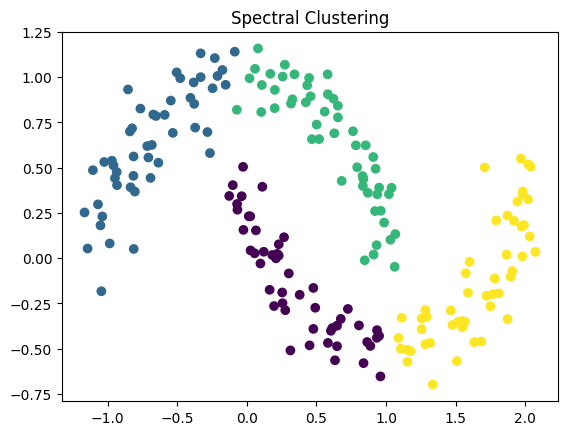

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y_sc)
plt.title('Spectral Clustering')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
df = pd.read_csv('/content/drive/MyDrive/CSV/sp500_data.csv', index_col=0)

In [42]:
stocks = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD', 'INTC',
          'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']

df = df[stocks].T
df

,1993-01-29,1993-02-01,1993-02-02,1993-02-03,1993-02-04,1993-02-05,1993-02-08,1993-02-09,1993-02-10,1993-02-11,...,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01
AAPL,-0.024235,0.064618,-0.016148,-0.032305,-0.016157,-0.064618,-0.016148,-0.004035,-0.040383,-0.020191,...,0.649994,-1.110001,0.120003,-0.450004,0.900002,-1.360001,-0.919998,-0.930000,-0.140000,-0.300004
AMZN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.090027,-5.339997,-0.709991,10.399994,-4.130005,2.029999,-3.660004,-5.120026,-0.110016,-1.959991
AXP,0.137909,-0.068951,-0.045970,0.045970,-0.022981,0.045970,0.045970,-0.045969,-0.022981,0.000000,...,0.528023,-0.328765,0.567875,-0.079703,-0.199258,-1.105863,-0.288920,-1.414705,-0.449997,-0.239997
COP,0.138703,0.070070,-0.093424,0.023359,0.093424,0.140137,-0.046712,0.000000,-0.140137,0.093424,...,-0.220002,-0.200001,0.100002,0.489998,-0.299999,-0.949997,0.029998,-0.410000,-0.119999,-1.479999
COST,0.000000,-0.149664,0.049888,0.099776,-0.049888,-0.099776,0.000000,-0.324272,0.000000,-0.024944,...,1.009995,-0.289993,-0.649994,-0.790008,-1.000000,-1.000000,0.119996,-1.319993,-1.320007,0.700012
CSCO,0.003106,0.018602,0.020147,-0.012399,-0.013943,-0.015496,-0.009301,-0.040293,0.021691,-0.012399,...,0.357246,-0.208393,-0.158775,-0.208393,-0.277860,-0.158775,-0.208393,-0.446558,-0.367171,-0.070000
CVX,0.072921,0.102089,0.029168,0.058337,0.044272,0.029514,0.088543,-0.029514,0.088543,0.073786,...,-0.010002,-0.250000,0.459999,0.129997,-0.710006,-1.110001,0.360000,-0.809998,-0.979996,-0.210007
GOOGL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.179993,1.000000,0.270020,3.600037,-3.909973,-2.349976,-6.650024,-5.500000,-5.050049,-0.359985
HD,0.106182,0.075843,-0.030339,0.000000,-0.060671,-0.106175,-0.182019,0.060671,0.060671,0.045505,...,0.790000,0.790001,0.140000,-0.059998,-0.590004,-1.000000,-0.169999,-1.019997,-0.020005,-0.379997
INTC,-0.050488,0.095367,0.000000,-0.050495,0.000000,-0.047687,-0.019632,-0.011223,0.044880,-0.053295,...,0.299999,-0.330002,0.000000,-0.220001,-0.240002,-0.030000,-0.490000,-0.310002,-0.209999,-0.310000


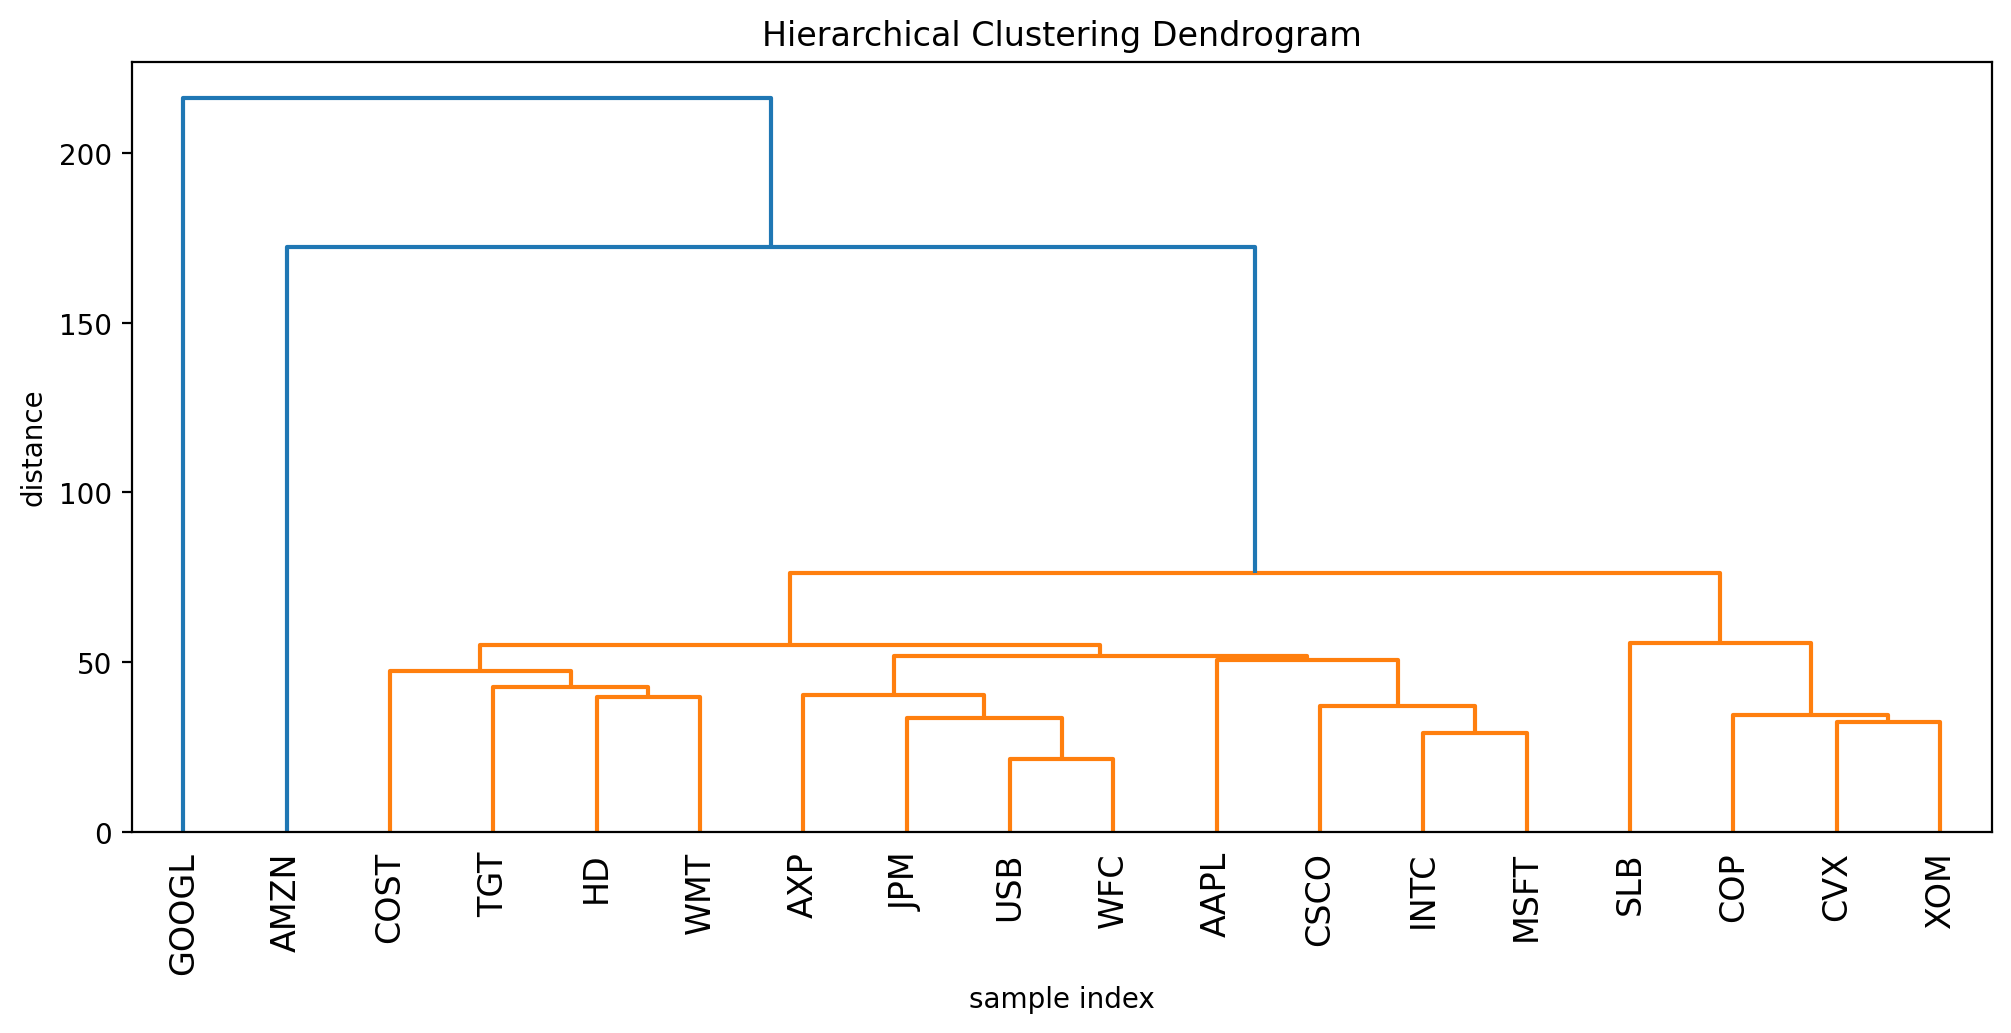

In [46]:
Z = linkage(df, 'complete')

plt.figure(figsize=(12, 5), dpi=200)
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.datasets import fetch_openml

In [49]:
mnist = fetch_openml('mnist_784')

In [53]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [55]:
mnist.url

'https://www.openml.org/d/554'

In [58]:
X = mnist.data
y = mnist.target

In [59]:
from sklearn.decomposition import PCA

In [61]:
X.shape

(70000, 784)

In [64]:
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)

In [65]:
X_pca.shape

(70000, 2)

In [68]:
y = y.astype('int')

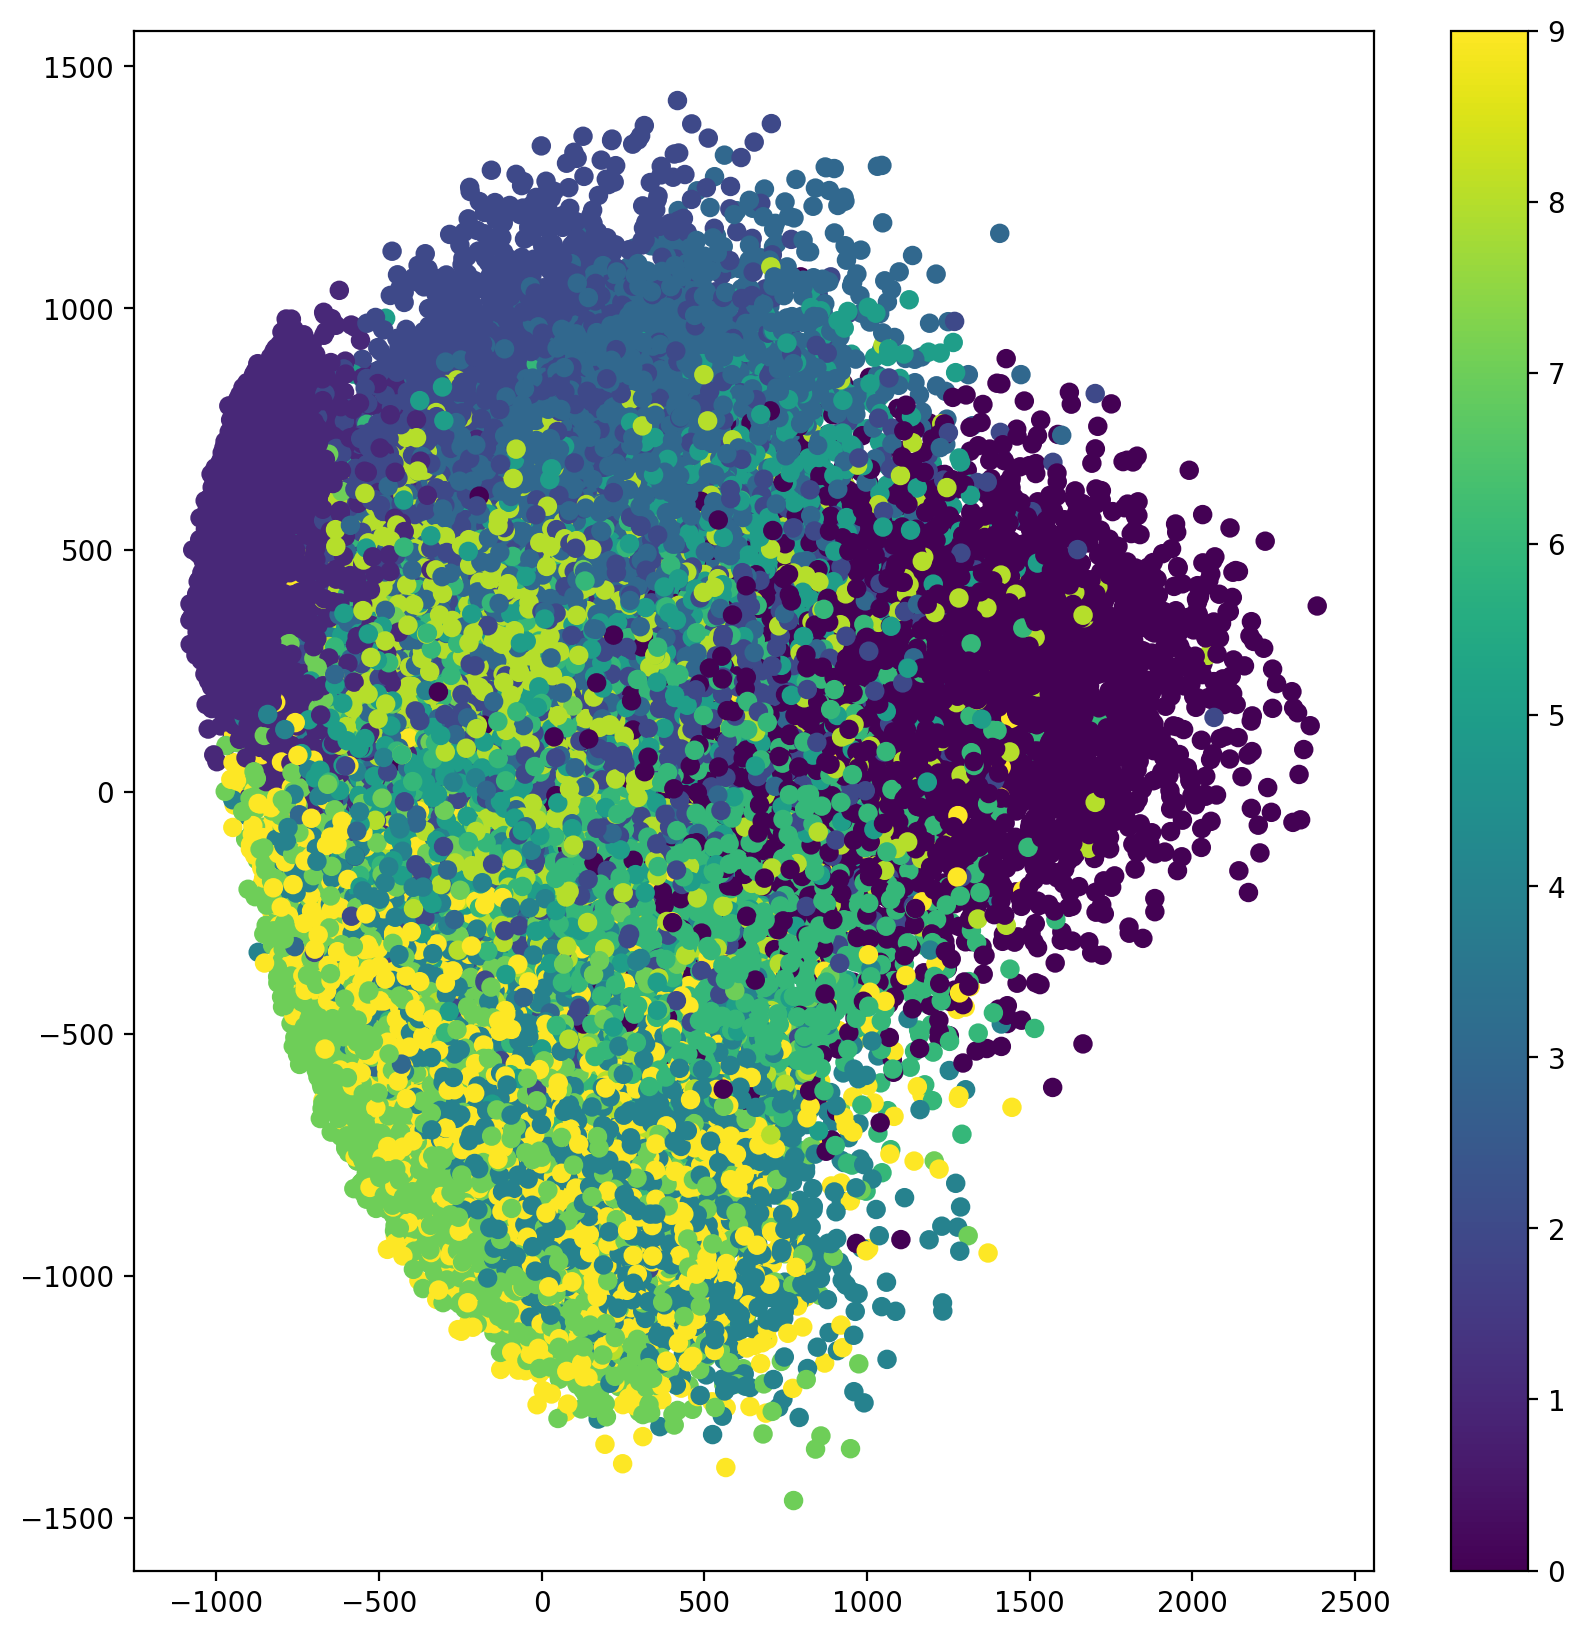

In [70]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 200

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar()
plt.show()